# Binary Classification using Neural Networks and Vanilla (simple) DL Models

In this section, we have built **ANN binary classification models** to **predict if one person is diabetes or not** using:

- Machine learning Python library of **scikit-learn** and

- the deep learning Python libraries of **Tensorflow - Keras**. 

# I- How to design MLP Artificial Neural Network Model using scikit-learn Library

A **multilayer perceptron** (**MLP**) is a type of fully connected feedforward artificial neural network (ANN). It uses Backpropagation training method and the some versions of Stochastic Gradient Descent learning algorithm to learn the right values of weights and biases inorder to map inputs to their corresponding labels given in the training dataset. 
A MLP has inputs and output layer, and may has one or more hidden layers with many neurons in between inputs and the output layer.

**scikit-learn** is a free software machine learning library for the Python programming language. It provides various classification, regression and clustering algorithms and so many other data analysis and analitics tools. 

A **multilayer perceptron** (**MLP**) network is implemented in the **scikit-learn** Python library as two different classes:

- **MLPRegressor** **class** implements a multi-layer perceptron (MLP) that trains using backpropagation with **identity function as activation function (means no activation function)** in the output layer. It uses the **square error as the loss function**, and the output is a set of continuous values.

- **MLPClassifier** **class** implements a multi-layer perceptron (MLP) that trains using backpropagation. It uses the **Cross-Entropy loss function**, and the output is a set of continuous values. 
In the case of **binary classification tasks**, it uses **logistic activation function**. It outputs the values larger or equal to 0.5 are rounded to 1, otherwise to 0.
In the case of **multi-class classification**, it uses **Softmax activation** function. 

Scikit-learn implementations of MLP use **Stochastic Gradient Descent (SGD), Adam, or L-BFGS learning algorithms**. With SGD or Adam, training supports online and mini-batch learning.  ‘L-BFGS’, training does not support online nor mini-batch learning. Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.



ALL ANN models including the Multi-layer Perceptron networks are **sensitive to feature scaling**, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. 


### Step 1 - Loading the required libraries and modules

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# conda install  TensorFlow
# The Official Keras Deep Neural Network Example for CNN 
###############################
# Setting Seed Random Number for Reproducibility
import numpy as np # linear algebra
np.random.seed(123)  # for reproducibility

# Setting Seed Random Number for the TensorFlow Backend
import tensorflow as tf
tf.random.set_seed(123) # for reproducibility

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
#%matplotlib inline

from tensorflow import keras
from keras import  backend as K



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2 - Loading the data and performing basic data exploration

In [2]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Step 3 - Setting the input variable (inputs, features) and output variable (response variable).

In [6]:
# Define the input variable and output variables, and display shapes of the X and y
X = dataset.iloc[:, :-1].values  # All columns except the last one
y = dataset.iloc[:, -1].values   # The last column (target variable)

# Display the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (768, 8)
Shape of y (target): (768,)


### Step 4 - Spliting the training and test datasets.

In [7]:
# Divide the dataset into the 75% training and 25% testing
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



### Step 5 - Scalling/Normalization of the input data

In [8]:
# Scale the training data inputs and test data inputs using the MinMax scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled=scaler.transform(X_test)

### Step 6 - Define, compile, and fit (train) the regression ANN model.

In [9]:
from sklearn.neural_network import MLPClassifier

# Step : Design an ANN model using the 3 hidden layers with the numbers of 24,6,3 neurons, relu activation function, adam training method
net = MLPClassifier(
    hidden_layer_sizes=(24, 6, 3),  # Number of neurons in each hidden layer
    activation='relu',              # Activation function
    solver='adam',                  # Training algorithm
    max_iter=5000,                  # Maximum number of iterations
    alpha=0.01,                     # Regularization parameter
    batch_size=124,                 # Batch size
    learning_rate_init=0.001,       # Initial learning rate
    random_state=2                  # Random state for reproducibility
)








In [10]:
# Train the ANN model using the scaled training data
net.fit(X_trainscaled, y_train)

MLPClassifier(alpha=0.01, batch_size=124, hidden_layer_sizes=(24, 6, 3),
              max_iter=5000, random_state=2)

### Step 7 - Display some properties of the trained neural network

The **coef_** attribute is implemented when the **fit()** method is called. Before that, it will be undefined.

In [11]:
# display the arhitecture of the neural network
[coef.shape for coef in net.coefs_]

[(8, 24), (24, 6), (6, 3), (3, 1)]

In [12]:
# # Step : display the learned weights
print("Learned weights:")
for i, coef in enumerate(net.coefs_):
    print(f"Layer {i + 1} weights shape: {coef.shape}\n{coef}")

Learned weights:
Layer 1 weights shape: (8, 24)
[[ 1.53646768e-01 -4.38923406e-01 -1.83941033e-58 -4.38263937e-58
  -6.25027417e-02 -2.41754097e-02 -3.20907570e-01  3.27506839e-01
  -6.30686779e-02 -3.73569943e-20  7.17357695e-02  1.06744109e-03
  -8.87353693e-02  1.80820170e-02 -9.96807665e-02  3.47925296e-01
   1.67200690e-01 -2.01309369e-03  2.27584811e-01 -1.05636510e+00
   1.60402182e-01 -1.22528473e+00 -1.13099327e-01 -2.20158173e-01]
 [-4.73290055e-01 -1.78161178e-01  3.74911775e-34 -3.14847198e-17
  -1.79145306e-01 -8.33561161e-02 -2.21388383e-01 -1.99064475e-01
   6.13953427e-01 -6.26045253e-05  2.75768858e-03  2.73837356e-01
  -3.72334381e-02  1.41739519e-02 -5.37842865e-01 -7.47225864e-03
   7.50634725e-01 -1.84763362e-01  2.07038895e-01  1.74700767e-01
  -1.25370063e-01  3.83283392e-01  4.39977702e-01 -1.31102059e-01]
 [ 1.64820481e-01  4.48998127e-01 -1.15755299e-58 -2.69876229e-15
  -1.77557072e-01  1.11162006e-01  7.87931330e-02 -3.14872905e-01
  -1.50768429e-01 -2.47539

In [13]:
# Step : display the learned biases
print("Learned biases:")
for i, intercept in enumerate(net.intercepts_):
    print(f"Layer {i + 1} biases shape: {intercept.shape}\n{intercept}")

Learned biases:
Layer 1 biases shape: (24,)
[ 3.47264863e-01 -5.46678110e-02 -2.59078130e-01 -9.67054350e-02
  2.63950652e-01  4.59393618e-04  5.91143988e-01  2.41821875e-01
 -4.20292883e-03 -4.98924801e-02 -2.42908440e-01 -3.85367364e-01
  2.66610826e-01  1.33089167e-02  5.05510518e-01  2.94445354e-01
  3.16114946e-01  5.52850631e-01  3.33630624e-01  2.15800552e-01
 -1.30019090e-01 -1.93064490e-01 -1.13150050e-01  5.35968339e-01]
Layer 2 biases shape: (6,)
[-0.09688989 -0.20525873  0.05535929 -0.181028   -0.02987516  0.27483253]
Layer 3 biases shape: (3,)
[-0.65958112 -0.55165212  0.30683178]
Layer 4 biases shape: (1,)
[-2.09515911]


* Displaying the some properties of the trained neural network

In [14]:
print('Activation function for hidden layers : {}'.format(net.activation))
# Hidden layer activation functions {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Activation function for the all hidden layers is the same
print('Output layer activation automatically set : {}'.format(net.out_activation_))
# MLPRegressor uses identity transfer function as output activation automatically. In the current version you can not set this parameter.
print('the input size automatically set : {}'.format(net.n_features_in_))
# MLPRegressor sets input size during the training by looking at the input variable automatically. In the current version you can not set this parameter.
print('Solver (training algorithm) : {}'.format(net.solver))
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
print('Alpha value : {}'.format(net.alpha))
print('Number of the training : {}'.format(net.n_iter_))

# MLPRegressor uses the Mean Square Error loss function. In the current version you can not set this parameter.



Activation function for hidden layers : relu
Output layer activation automatically set : logistic
the input size automatically set : 8
Solver (training algorithm) : adam
Alpha value : 0.01
Number of the training : 497


In [15]:
from sklearn.metrics import confusion_matrix
y_pred = net.predict(X_testscaled)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",cf_matrix)

Confusion matrix:
 [[100  23]
 [ 22  47]]


### Step 8 - Predict on the test data and estimate accuracy of the trained network.

In [16]:
# Step : Display the accuracy of the ANN model using the training data
print("Training accuracy:", net.score(X_trainscaled, y_train))


Training accuracy: 0.8159722222222222


In [17]:
# Step : Display the test accuracy of the ANN model using the test data
print("Test accuracy:", net.score(X_testscaled, y_test))

Test accuracy: 0.765625


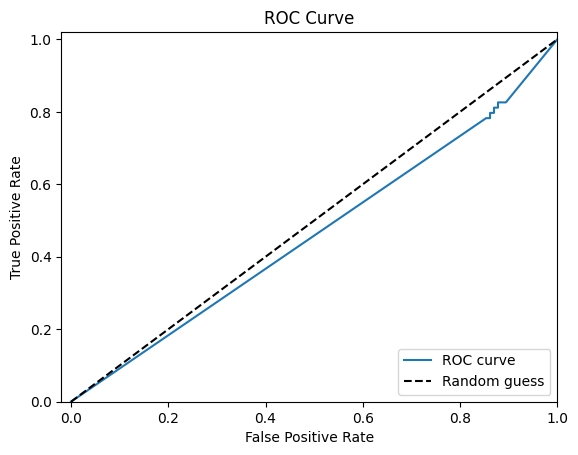

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# %matplotlib inline

y_pred_prob = net.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

### Step 9 - Scoring: Making the prediction using the trained network 

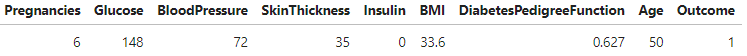

In [19]:
# Step 7: Make a prediction and display for the following inputs [6,148,72,35,0,33.6,0.627,50]

new_input = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50])
new_input_scaled = scaler.transform([new_input])

prediction = net.predict(new_input_scaled)

print(f"Prediction for input {new_input}: {prediction[0]}")


Prediction for input [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]: 1


In [20]:
# Using the trained network in the production environment to make the real time prediction

import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
# Using interact() as a decorator
@interact(
    # Specifying the handler for the arguments in the function predict
    x1 = widgets.FloatSlider(min=0, max=20, step=1, value=6, description="Pregnancies:"),
    x2 = widgets.FloatSlider(min=0, max=210, step=1, value=148, description="Glucose:"),
    x3 = widgets.FloatSlider(min=0, max=140, step=1, value=72, description="Blood Pressure:"),
    x4 = widgets.FloatSlider(min=0, max=110, step=1, value=35, description="Skin Thickness:"),
    x5 = widgets.FloatSlider(min=0, max=900, step=1, value=0, description="Insulin:"),
    x6 = widgets.FloatSlider(min=0, max=80, step=0.1, value=33.6, description="BMI:"),
    x7 = widgets.FloatSlider(min=0, max=2.5, step=0.01, value=0.627, description="Diabetes Pedigree Function:"),
    x8 = widgets.FloatSlider(min=1, max=100, step=1, value=50, description="Age:")
)

def predict(x1, x2, x3, x4, x5, x6, x7, x8):
   
    # present new data
    new_input = np.array([x1, x2, x3, x4, x5, x6, x7, x8])
    new_input_scaled = scaler.transform([new_input])
    # make a prediction
    yhat = net.predict(new_input_scaled)
    # summarize prediction
    print('If inputs are [%1.1f, %1.1f,%1.1f, %1.1f,%1.1f,%1.1f, %1.1f,%1.1f] prediction for the diabates is : %d' % (x1,x2,x3,x4,x5,x6,x7,x8,yhat[0]))

interactive(children=(FloatSlider(value=6.0, description='Pregnancies:', max=20.0, step=1.0), FloatSlider(valu…

# II - How to design ANN for binary classification tasks using the Tensorflow - Keras

## Design (Implement) the Neural networks using the Keras
**Keras** is an **open-source DL library** that provides a Python interface **for** **neural networks**. Keras acts as an interface for the TensorFlow library. 
Designed to develop **deep neural networks** fast, it focuses on being user-friendly, modular, and extensible.

Using **Keras library's dense layer** module, you can design the feedforward artificial neural networks.  

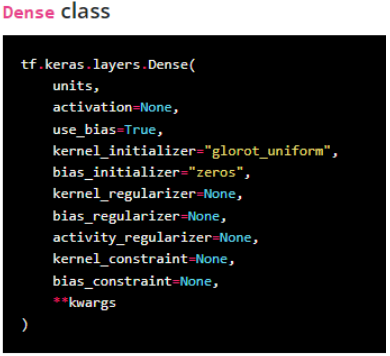

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation

# Step 8: Design an ANN model using an Input layer, 2 hidden layers with the numbers of 24,12 neurons with relu activation function 
# and output layer

n_input_variables = X.shape[1]  # 5

model = Sequential()
model.add(Input(shape=(n_input_variables,)))    # Input layer
model.add(Dense(24, activation='relu'))    # Hidden layer 1 (dense layer 1)
model.add(Dense(12, activation='relu'))    # Hidden layer 2 (dense layer 2)
model.add(Dense(1))    # Output layer   (dense layer 3)
    
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

## Train and Scoring the model
Keras library provides function for training, evaluation and prediction process. 

**compile** − Configure the model for training

**fit** − Train the model using the training data

**evaluate** − Evaluate the model using the test data

**predict** − Make prediction for new inputs.

In [22]:
#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [23]:
#Fitting the data to the training dataset
history = model.fit(X_trainscaled,y_train, batch_size=10, epochs=150,
                   validation_data=(X_testscaled, y_test))

Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6731 - loss: 1.1873 - val_accuracy: 0.6719 - val_loss: 0.6635
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 0.5958 - val_accuracy: 0.6458 - val_loss: 0.6309
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.5755 - val_accuracy: 0.6719 - val_loss: 0.6093
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.5570 - val_accuracy: 0.6562 - val_loss: 0.5920
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7022 - loss: 0.5394 - val_accuracy: 0.6562 - val_loss: 0.5800
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5248 - val_accuracy: 0.6510 - val_loss: 0.5719
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.5115 - val_accuracy: 0.6562 - val_loss: 0.5689
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7447 - loss: 0.5002 - val_accuracy: 0.6667 - v

We can also evaluate the loss value & accuracy metrics for the model 

In [24]:
# Measure and display the training accuracy using the evaluate method
train_loss, train_accuracy = model.evaluate(X_trainscaled, y_train)
print(f"Training Accuracy: {train_accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8483 - loss: 0.2981 
Training Accuracy: 0.8350694179534912


In [25]:
# Measure and display the test accuracy using the evaluate method
test_loss, test_accuracy = model.evaluate(X_testscaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7600 - loss: 1.2666 
Test Accuracy: 0.7395833134651184


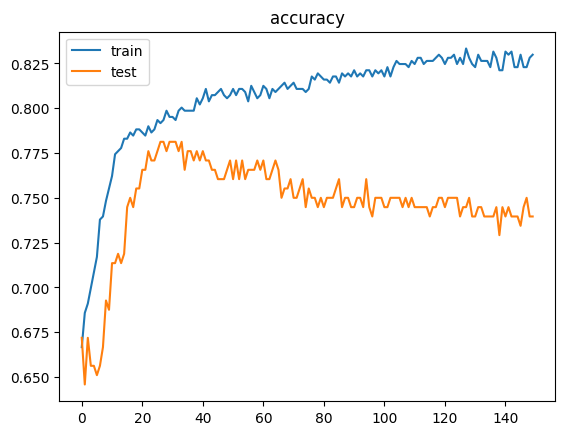

In [26]:
# Visualize the training errors
import matplotlib.pyplot as pyplot
pyplot.title('accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

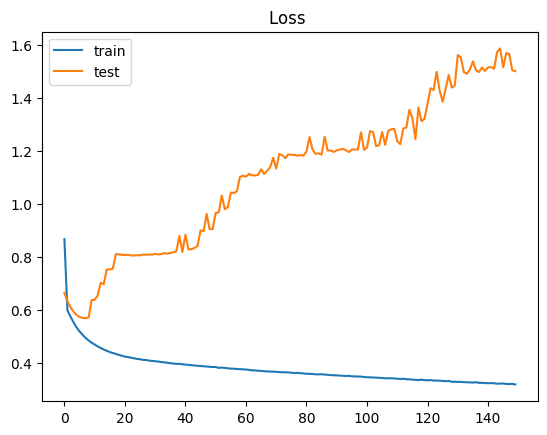

In [27]:
import matplotlib.pyplot as pyplot
pyplot.title('Loss ')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


<Axes: >

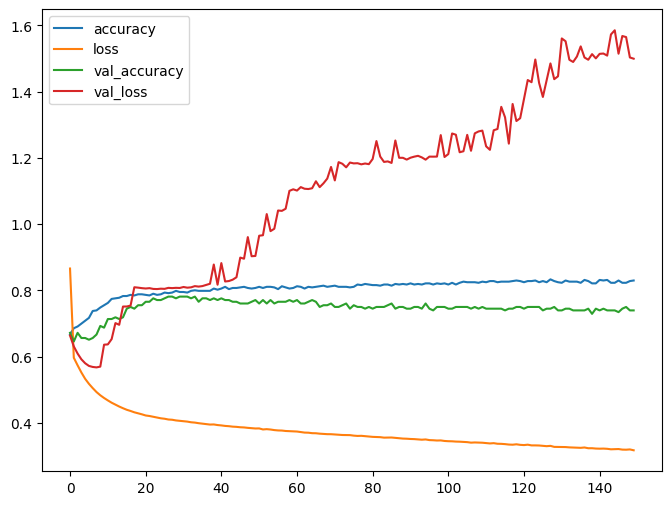

In [28]:
losses = pd.DataFrame(history.history)
losses.plot(figsize=(8,6))

## Report the performance of the Neural Network over the test dataset 

In [29]:
from sklearn.metrics import accuracy_score
y_pred_tst= (model.predict(X_testscaled)>0.5).astype('int32')
print("Test accuracy: ",accuracy_score(y_test,y_pred_tst))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Test accuracy:  0.7395833333333334


In [30]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_trn= (model.predict(X_trainscaled)>0.5).astype('int32')
print("Training accuracy: ",accuracy_score(y_train,y_pred_trn))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training accuracy:  0.8350694444444444


In [31]:
# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_tst))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       123
           1       0.63      0.67      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



In [32]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_tst))

Confusion matrix:
[[96 27]
 [23 46]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


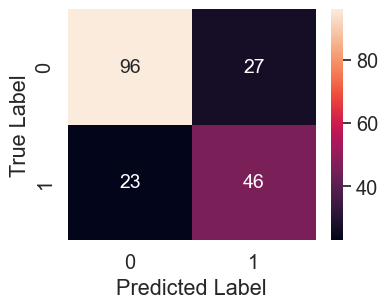

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_predtst = (model.predict(X_testscaled)>0.5).astype('int32')
cf_matrix = confusion_matrix(y_test, y_predtst)
df_cm = pd.DataFrame(cf_matrix, range(cf_matrix.shape[0]), range(cf_matrix.shape[1]))
plt.figure(figsize=(4,3))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
from sklearn.metrics import recall_score
print("Recall: ",recall_score(y_test, y_pred_tst))

from sklearn.metrics import precision_score
print("Precision: ",precision_score(y_test, y_pred_tst))

from sklearn.metrics import f1_score
print("F1 score: ",f1_score(y_test, y_pred_tst))

Recall:  0.6666666666666666
Precision:  0.6301369863013698
F1 score:  0.647887323943662


#### ROC Curve

In [35]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_testscaled).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
y_pred_net = net.predict_proba(X_test)[:, 1]
fpr_net, tpr_net, thresholds_net = roc_curve(y_test, y_pred_net)
auc_net = auc(fpr_net, tpr_net)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


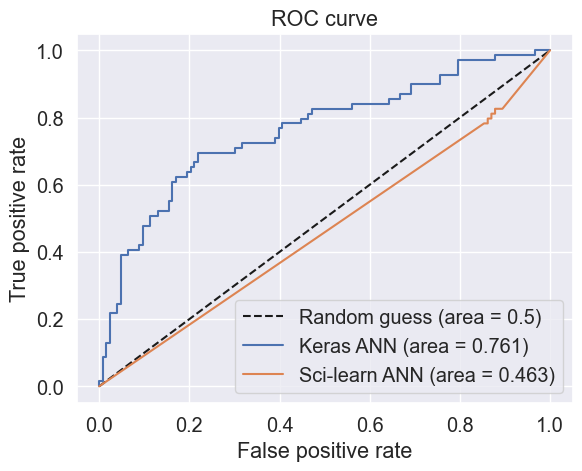

In [36]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess (area = {:.1f})'.format(0.5))
plt.plot(fpr_keras, tpr_keras, label='Keras ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_net, tpr_net, label='Sci-learn ANN (area = {:.3f})'.format(auc_net))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Implementing a User Interface to interact with the model using Widgets

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [37]:
import ipywidgets as widgets
from ipywidgets import Button, Layout
from ipywidgets import interact
import numpy as np

style = {'description_width': 'initial'}

# Using interact() as a decorator
@interact(
    # Specifying the handler for the arguments in the function predict
    x1 = widgets.FloatSlider(min=0.0, max=20, step=1, value=1, 
                             description="Input 1 (Number of times pregnant) ........:"
                            ,style=style,layout=Layout(width='50%')),
    x2 = widgets.FloatSlider(min=0.0, max=220, step=1, value=85, 
                             description="Input 2 (Plasma glucose concentration)....:"
                            ,style=style,layout=Layout(width='50%')),
    x3 = widgets.FloatSlider(min=0.0, max=120, step=1, value=66, 
                             description="Input 3 (Diastolic blood pressure (mm Hg)):"
                            ,style=style,layout=Layout(width='50%')),
    x4 = widgets.FloatSlider(min=0.0, max=110, step=1, value=29, 
                             description="Input 4 (Triceps skin fold thickness (mm)):"
                            ,style=style,layout=Layout(width='50%')),
    x5 = widgets.FloatSlider(min=0.0, max=700, step=1, value=440, 
                             description="Input 5 (2-Hour serum insulin (mu U/ml))..:"
                            ,style=style,layout=Layout(width='50%')),
    x6 = widgets.FloatSlider(min=0.0, max=70, step=1, value=3, 
                             description="Input 6 (BMI (weight in kg/(height in m)^2)):"
                            ,style=style,layout=Layout(width='50%')),
    x7 = widgets.FloatSlider(min=0.0, max=3, step=0.01, value=0.35, 
                             description="Input 7 (Diabetes pedigree function) .....:"
                            ,style=style,layout=Layout(width='50%')),
    x8 = widgets.FloatSlider(min=0.0, max=100, step=1, value=21, 
                             description="Input 8 (Age (years)) ...................................:"
                            ,style=style,layout=Layout(width='50%')),
)
def predict(x1,x2,x3,x4,x5,x6,x7,x8):
   
    # present new data
    new_input = np.array([[x1, x2, x3, x4, x5, x6, x7, x8 ]])
    new_input_scaled = scaler.transform(new_input)
    # make a prediction
    yhat = net.predict(new_input_scaled)
    y_pred=model.predict(new_input_scaled)
    print("prediction of the neural network: ",y_pred)
    
    
    if y_pred < 0.5: 
        prediction="No Diabetes" 
    else: 
        prediction="Diabetes"
    # summarize prediction
    print('If inputs are [%1.1f, %1.1f,%1.1f, %1.1f,%1.1f, %1.1f,%1.1f,%1.1f] predicted class is : %s' % (x1, x2, x3,x4,x5,x6,x7,x8,prediction))

interactive(children=(FloatSlider(value=1.0, description='Input 1 (Number of times pregnant) ........:', layou…

## Model Structure
Keras provides few methods to get the model information like layers, input data and output data. 

model.layers − Returns all the layers of the model as list.

model.inputs − Returns all the input tensors of the model as list.

model.outputs − Returns all the output tensors of the model as list.
model.get_weights − Returns all the weights as NumPy arrays.
model.set_weights(weight_numpy_array) − Set the weights of the model.

In [38]:
layers = model.layers 
print(layers) 

inputs = model.inputs 
print(inputs) 

outputs = model.outputs 
print(outputs) 

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
[<KerasTensor shape=(None, 8), dtype=float32, sparse=None, name=keras_tensor>]
[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_6>]


**model.get_weights()** − Returns all the weights as a list object.

In [39]:
# Display the learned parameters of the Keras NN
print(model.get_weights())

[array([[ 0.2558386 , -0.41258684,  0.24902885, -0.31176826,  0.34877127,
        -0.26116753,  0.664088  , -0.29828575,  0.53146327, -0.09158043,
        -0.37881407, -0.38139626,  0.5197553 ,  0.357407  , -0.1822637 ,
         0.18127662,  0.28534096, -0.08540999,  0.04358368, -0.1836803 ,
         0.20350313, -0.15400381,  0.46205512,  0.76547915],
       [-0.11404146,  0.5487686 ,  0.42106003, -0.234834  , -0.3451609 ,
         0.01683741,  0.16444556, -0.28568572,  0.10677604, -0.03683077,
         0.35568994,  0.49639302,  0.02160432,  0.3067455 , -0.2849488 ,
        -0.03324384, -0.43776992,  0.08530404,  0.37168336,  0.05987648,
         0.10618912,  0.4233504 ,  0.1873927 , -0.21846303],
       [ 0.43951437, -0.20125927, -0.05286391,  0.29359233, -0.05618829,
        -0.04531999, -0.13734673,  0.2582398 ,  0.40237576,  0.28556067,
        -0.09548058, -0.29844707,  0.34140784, -0.4738804 ,  0.30688015,
        -0.4027255 , -0.06030379, -0.3536931 , -0.22405504, -0.397819  ,
 

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589 (6.21 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,060 (4.14 KB)

In [42]:
# Visualize Model
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True, 
           dpi=50, 
           show_layer_activations=True,
           show_trainable=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

# Interface using Gradio
### You can test the following codes in your PC (optional)
if you want to test the following codes in your PC remove the comments

In [ ]:
'''
!pip install gradio
import gradio as gr
def predict_fun_(num1, num2,num3, num4,num5, num6,num7, num8):
    inp= np.array([[num1, num2,num3, num4,num5, num6,num7, num8]])
    print([inp])
    y_pred=model.predict([inp])
    return "Diabetes" if y_pred > 0.5 else "No Diabetes"


interface = gr.Interface(fn=predict_fun_, 
            inputs=[gr.components.Slider(minimum=0, maximum=20,value=0, step=1,label="Pregnancies"), 
                    gr.components.Slider(minimum=0, maximum=250,value=120, step=1,label="Glucose"),
                    gr.components.Slider(minimum=0, maximum=150,value=69, step=1,label="Blood Pressure"),
                    gr.components.Slider(minimum=0, maximum=120,value=20, step=1,label="Skin Thickness"),
                    gr.components.Slider(minimum=0, maximum=1000,value=80, step=1,label="Insulin"),
                    gr.components.Slider(minimum=0, maximum=80,value=32, step=1,label="BMI"),
                    gr.components.Number(value=0.47, label="Diabetes Pedigree Function"),
                    gr.components.Slider(minimum=0, maximum=100,value=33, step=1,label="Age")], 
                         outputs=gr.components.Textbox(label="Prediction"), 
                         title="ANN Classifier Model for Diabetes Prediction",
                         description="Enter the diagnostic test results to predict diabetes.")

interface.launch(share=True,debug=True) # Uncoment this line to see the Gradio Interface

'''